### Imports

In [19]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import util

sns.set_style('whitegrid')
plt.style.use('Cole_2018.mplstyle')

### Load data

In [2]:
df, df_shops, df_ingredients = util.load_burritos()
df.tail()

,Location,Burrito,Date,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Rec,Reviewer,Notes
368,tony's fresh mexican food,la paz,5/22/2018,9.99,5.0,NaN,NaN,20.0,22.0,0.77,4.0,4.0,3.0,3.0,5.0,3.5,NaN,3.0,4.5,4.0,NaN,hannah,NaN
369,tony's fresh mexican food,la paz,5/22/2018,9.99,4.0,NaN,NaN,20.0,22.0,0.77,5.0,5.0,3.0,3.0,4.0,4.0,2.0,4.0,3.0,4.0,NaN,mike,NaN
370,tony's fresh mexican food,adobada,5/22/2018,7.39,4.0,NaN,NaN,24.0,21.0,0.84,5.0,4.0,4.0,3.0,4.0,5.0,4.0,4.0,5.0,4.0,NaN,nick g.,NaN
371,tony's fresh mexican food,adobada,5/22/2018,7.39,4.5,NaN,NaN,21.0,22.5,0.85,3.5,4.5,4.0,3.5,2.0,1.0,3.5,3.5,4.0,3.5,NaN,ricardo,NaN
372,tony's fresh mexican food,veggie,5/22/2018,7.39,4.0,NaN,NaN,22.0,20.0,0.70,3.0,5.0,NaN,3.0,NaN,4.0,NaN,3.0,4.0,3.5,NaN,erin,NaN


# Compare burrito features across restaurants

Volume MannwhitneyuResult(statistic=236.5, pvalue=0.053720982270369484) N= 51
Tortilla MannwhitneyuResult(statistic=283.5, pvalue=0.22976942626061359) N= 51
Temp MannwhitneyuResult(statistic=277.0, pvalue=0.19568249178484987) N= 51
Meat MannwhitneyuResult(statistic=227.0, pvalue=0.03380105165174376) N= 51
overall MannwhitneyuResult(statistic=115.5, pvalue=4.394791153962735e-05) N= 51


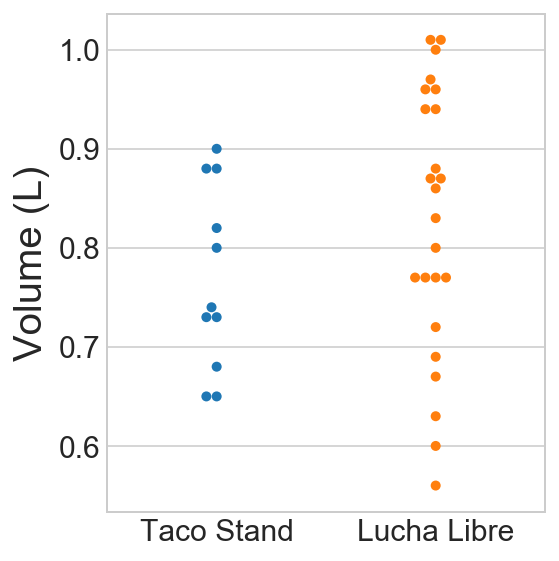

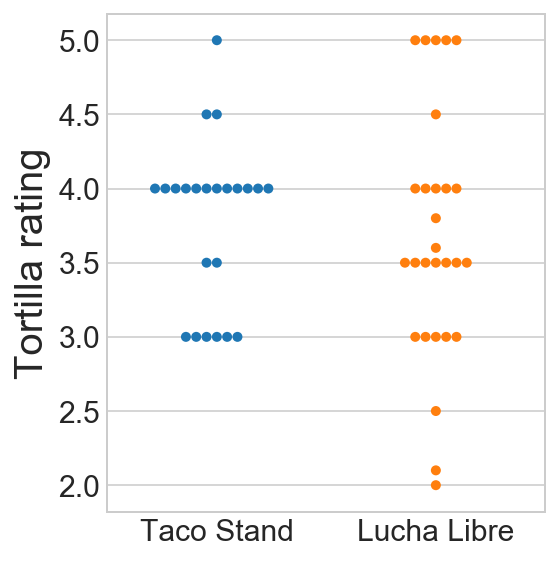

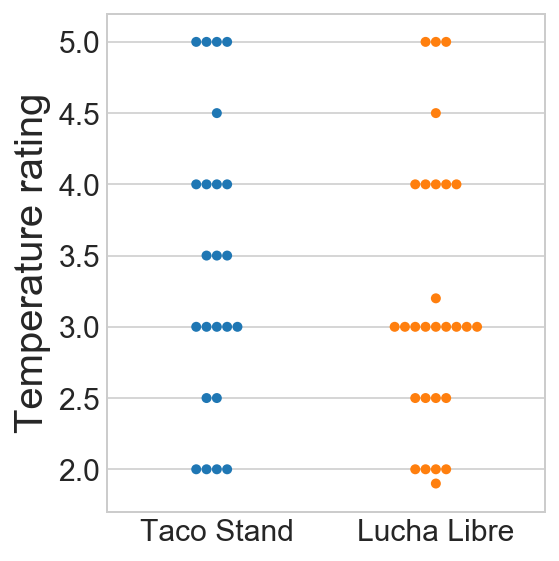

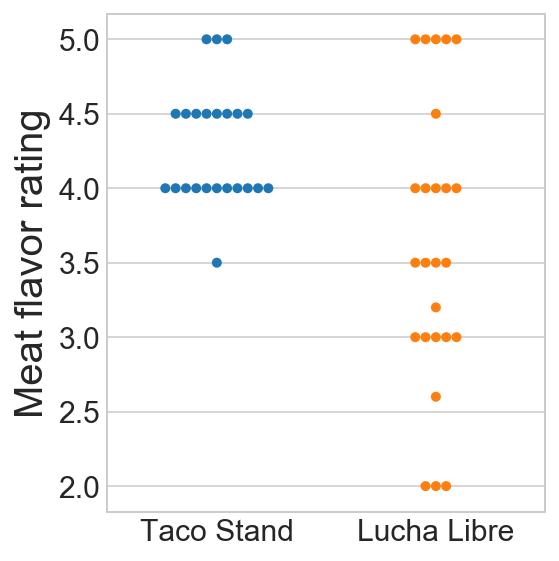

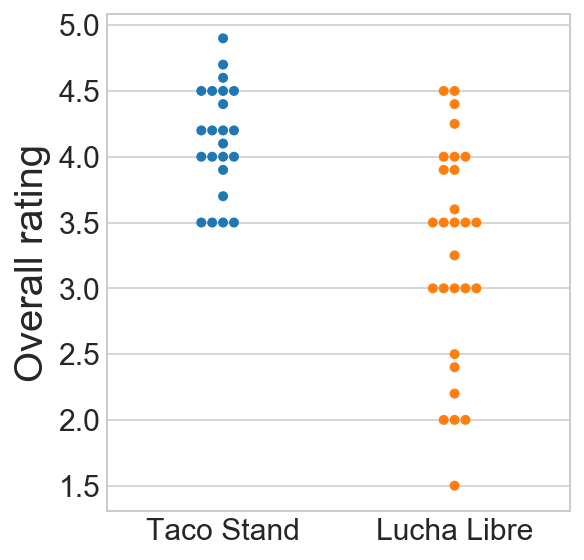

In [27]:
rest_include = ['taco stand', 'lucha libre north park']
rest_names = {'taco stand': 'Taco Stand', 'lucha libre north park': 'Lucha Libre'}
cols_keep = ['Location', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings', 'Meat:filling', 'Uniformity',
             'Salsa', 'Synergy', 'Wrap', 'overall']
df_plt = df[df['Location'].isin(rest_include)][cols_keep].copy()
df_plt.replace(rest_names, inplace=True)

cols_plt = ['Volume', 'Tortilla', 'Temp', 'Meat', 'overall']
cols_ylabels = {'Volume': 'Volume (L)',
                'Tortilla': 'Tortilla rating',
                'Temp': 'Temperature rating',
                'Meat': 'Meat flavor rating',
                'overall': 'Overall rating'}
for col in cols_plt:
    plt.figure(figsize=(4,4))
    sns.swarmplot(x='Location', y=col, data=df_plt, dodge=True)
    
    xs_ts = df_plt[df_plt['Location']=='Taco Stand'][col]
    xs_lucha = df_plt[df_plt['Location']=='Lucha Libre'][col]
    plt.ylabel(cols_ylabels[col])
    plt.xlabel('')
    print(col, stats.mannwhitneyu(xs_ts, xs_lucha), 'N=',len(df_plt))
    plt.tight_layout()
    plt.savefig('/gh/fig/burrito/tacostand_lucha_{:s}.png'.format(col))